In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy.stats import randint, uniform
from sklearn.model_selection import RandomizedSearchCV

In [20]:
df=pd.read_csv("climate_change_dataset.csv")
df.head()

,Year,Country,Avg Temperature (°C),CO2 Emissions (Tons/Capita),Sea Level Rise (mm),Rainfall (mm),Population,Renewable Energy (%),Extreme Weather Events,Forest Area (%)
0,2006,UK,8.9,9.3,3.1,1441,530911230,20.4,14,59.8
1,2019,USA,31.0,4.8,4.2,2407,107364344,49.2,8,31.0
2,2014,France,33.9,2.8,2.2,1241,441101758,33.3,9,35.5
3,2010,Argentina,5.9,1.8,3.2,1892,1069669579,23.7,7,17.7
4,2007,Germany,26.9,5.6,2.4,1743,124079175,12.5,4,17.4


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Year                         1000 non-null   int64  
 1   Country                      1000 non-null   object 
 2   Avg Temperature (°C)         1000 non-null   float64
 3   CO2 Emissions (Tons/Capita)  1000 non-null   float64
 4   Sea Level Rise (mm)          1000 non-null   float64
 5   Rainfall (mm)                1000 non-null   int64  
 6   Population                   1000 non-null   int64  
 7   Renewable Energy (%)         1000 non-null   float64
 8   Extreme Weather Events       1000 non-null   int64  
 9   Forest Area (%)              1000 non-null   float64
dtypes: float64(5), int64(4), object(1)
memory usage: 78.3+ KB


In [22]:
df.describe()

,Year,Avg Temperature (°C),CO2 Emissions (Tons/Capita),Sea Level Rise (mm),Rainfall (mm),Population,Renewable Energy (%),Extreme Weather Events,Forest Area (%)
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000
mean,2011.432000,19.883100,10.425800,3.009600,1738.761000,7.053830e+08,27.300500,7.291000,40.572000
std,7.147199,8.542897,5.614665,1.146081,708.976616,4.093910e+08,12.970808,4.422655,17.398998
min,2000.000000,5.000000,0.500000,1.000000,501.000000,3.660891e+06,5.100000,0.000000,10.100000
25%,2005.000000,12.175000,5.575000,2.000000,1098.750000,3.436242e+08,16.100000,3.000000,25.600000
50%,2012.000000,20.100000,10.700000,3.000000,1726.000000,7.131166e+08,27.150000,8.000000,41.150000
75%,2018.000000,27.225000,15.400000,4.000000,2362.500000,1.073868e+09,38.925000,11.000000,55.800000
max,2023.000000,34.900000,20.000000,5.000000,2999.000000,1.397016e+09,50.000000,14.000000,70.000000


In [23]:
df.isna().sum()

,0
Year,0
Country,0
Avg Temperature (°C),0
CO2 Emissions (Tons/Capita),0
Sea Level Rise (mm),0
Rainfall (mm),0
Population,0
Renewable Energy (%),0
Extreme Weather Events,0
Forest Area (%),0


In [24]:
numerical_columns=df.select_dtypes(include=['number'])
numerical_columns

,Year,Avg Temperature (°C),CO2 Emissions (Tons/Capita),Sea Level Rise (mm),Rainfall (mm),Population,Renewable Energy (%),Extreme Weather Events,Forest Area (%)
0,2006,8.9,9.3,3.1,1441,530911230,20.4,14,59.8
1,2019,31.0,4.8,4.2,2407,107364344,49.2,8,31.0
2,2014,33.9,2.8,2.2,1241,441101758,33.3,9,35.5
3,2010,5.9,1.8,3.2,1892,1069669579,23.7,7,17.7
4,2007,26.9,5.6,2.4,1743,124079175,12.5,4,17.4
...,...,...,...,...,...,...,...,...,...
995,2019,23.6,8.0,1.2,1365,1358019778,10.0,8,20.2
996,2000,21.8,10.0,2.2,1273,876123161,14.9,14,30.1
997,2019,23.8,8.9,4.7,891,1120533308,25.9,10,46.5
998,2016,21.0,14.9,3.1,1136,380662109,24.5,3,44.5


In [25]:
df.head()

,Year,Country,Avg Temperature (°C),CO2 Emissions (Tons/Capita),Sea Level Rise (mm),Rainfall (mm),Population,Renewable Energy (%),Extreme Weather Events,Forest Area (%)
0,2006,UK,8.9,9.3,3.1,1441,530911230,20.4,14,59.8
1,2019,USA,31.0,4.8,4.2,2407,107364344,49.2,8,31.0
2,2014,France,33.9,2.8,2.2,1241,441101758,33.3,9,35.5
3,2010,Argentina,5.9,1.8,3.2,1892,1069669579,23.7,7,17.7
4,2007,Germany,26.9,5.6,2.4,1743,124079175,12.5,4,17.4


In [26]:
df.duplicated().sum()

0

# Distribution of numeircal columns

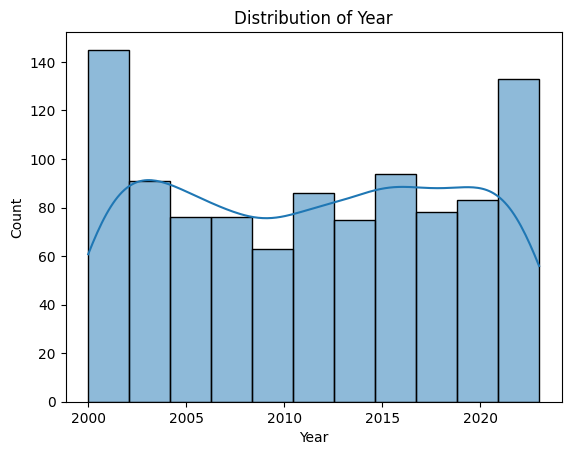

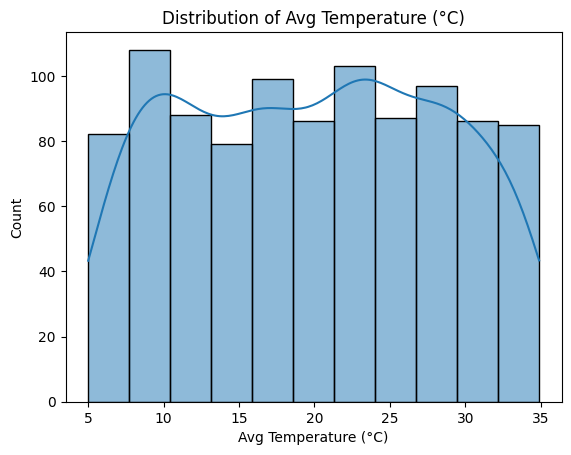

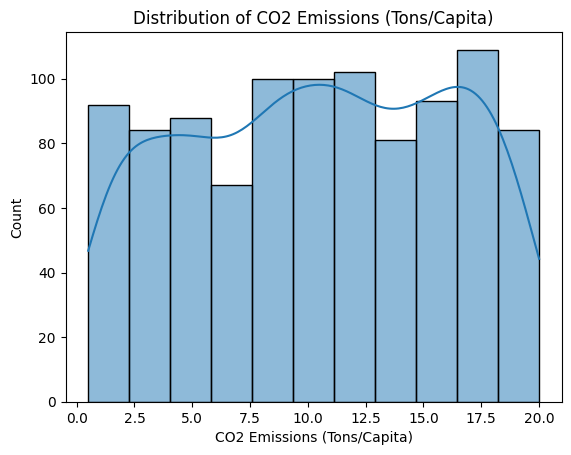

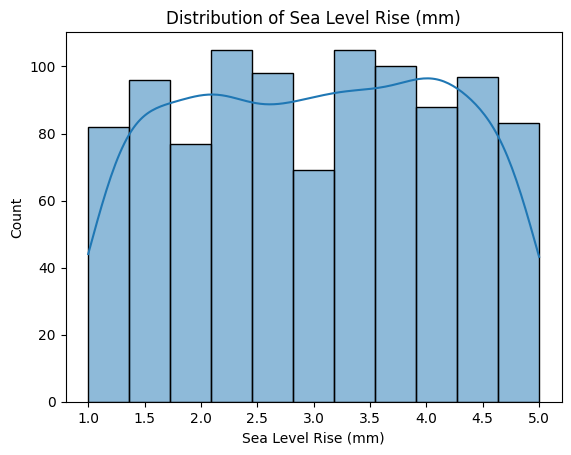

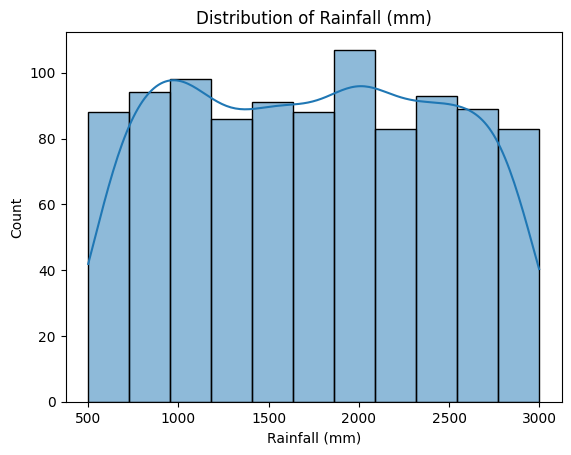

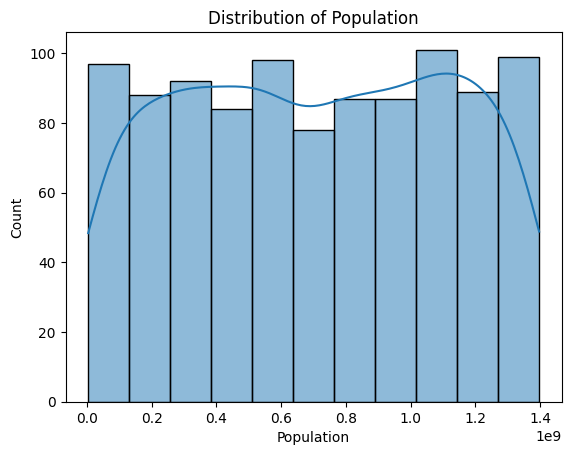

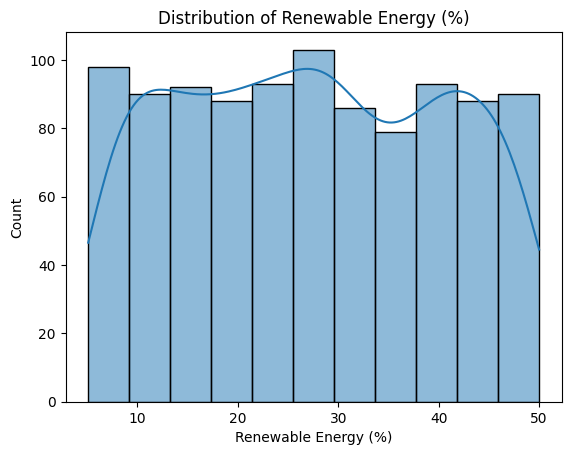

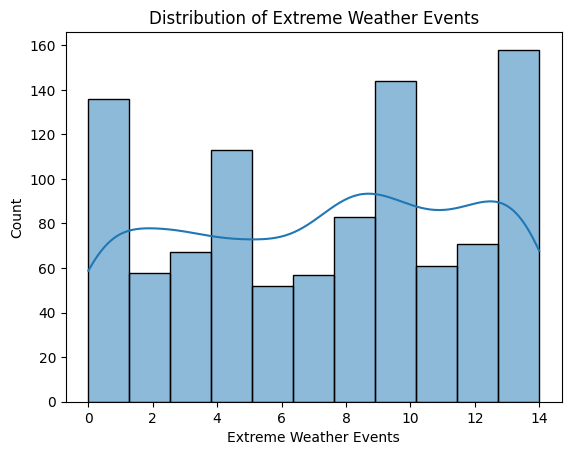

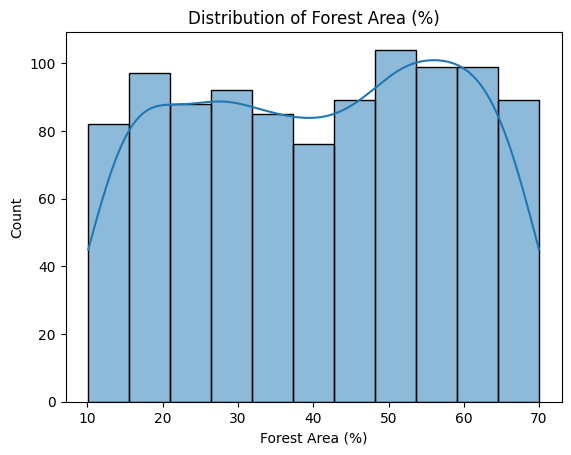

In [27]:
for col in numerical_columns.columns:
    sns.histplot(df[col],kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

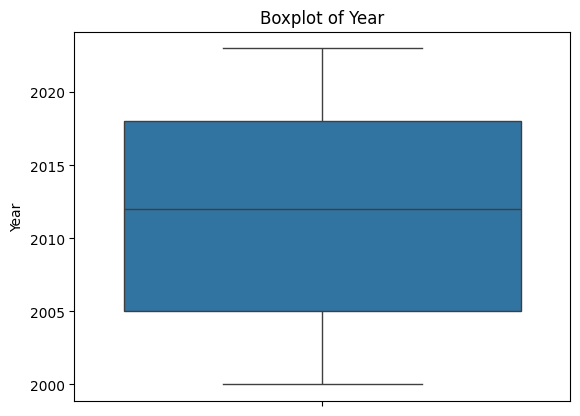

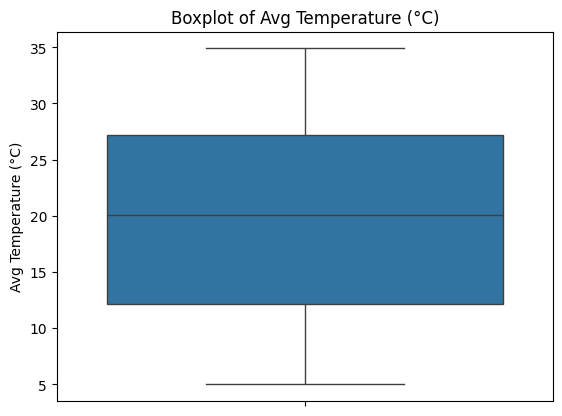

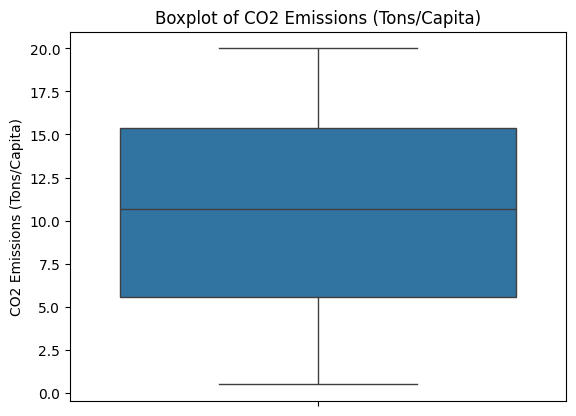

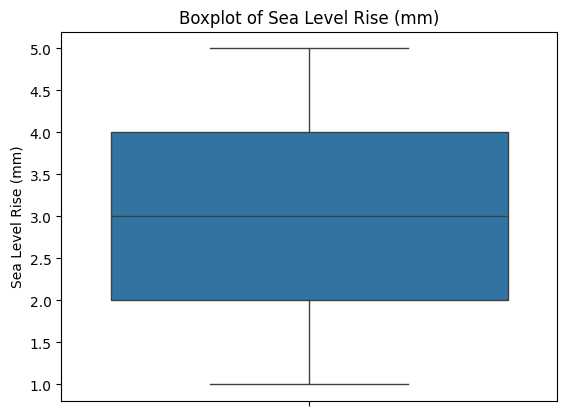

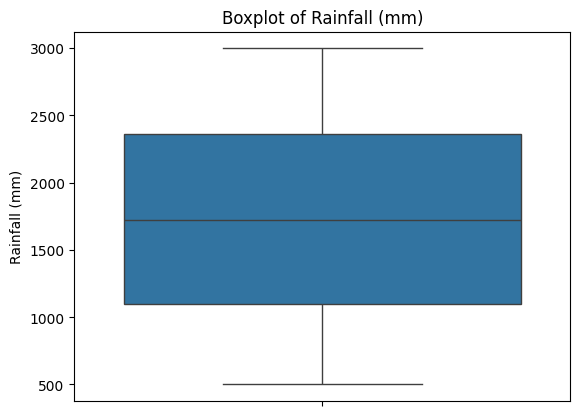

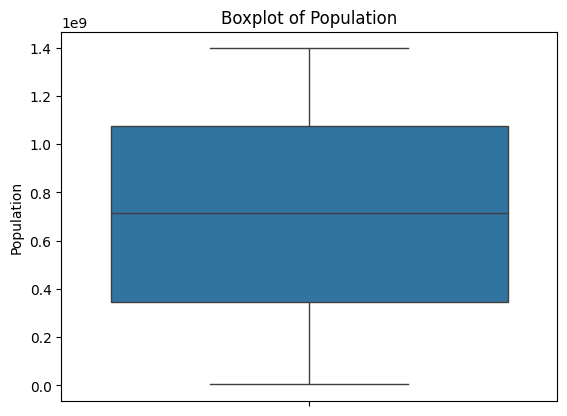

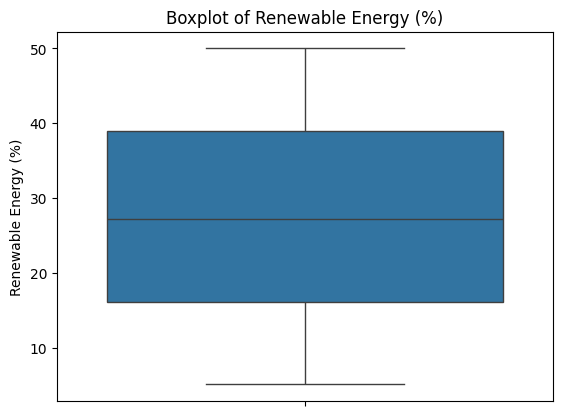

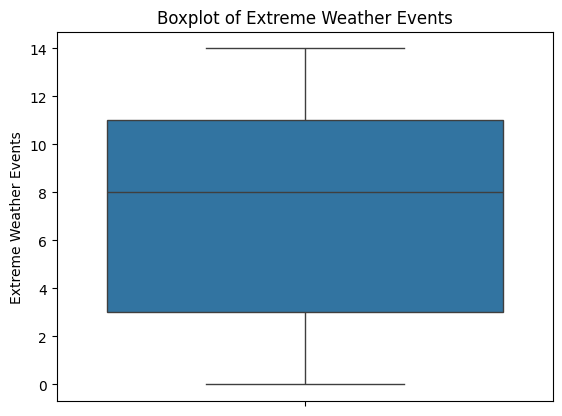

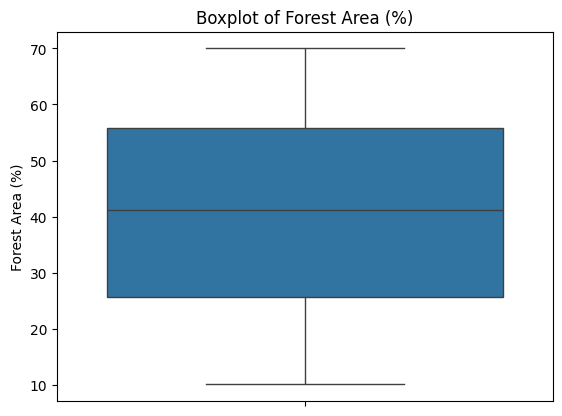

In [28]:
for cols in numerical_columns.columns:
    sns.boxplot(df[cols])
    plt.title(f'Boxplot of {cols}')
    plt.show()

In [29]:
df.groupby(['Year'])['Avg Temperature (°C)'].value_counts()

Year  Avg Temperature (°C)
2000  14.4                    2
      15.1                    2
      15.3                    2
      26.7                    2
      5.1                     1
                             ..
2023  31.0                    1
      31.9                    1
      32.4                    1
      33.3                    1
      33.5                    1
Name: count, Length: 941, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

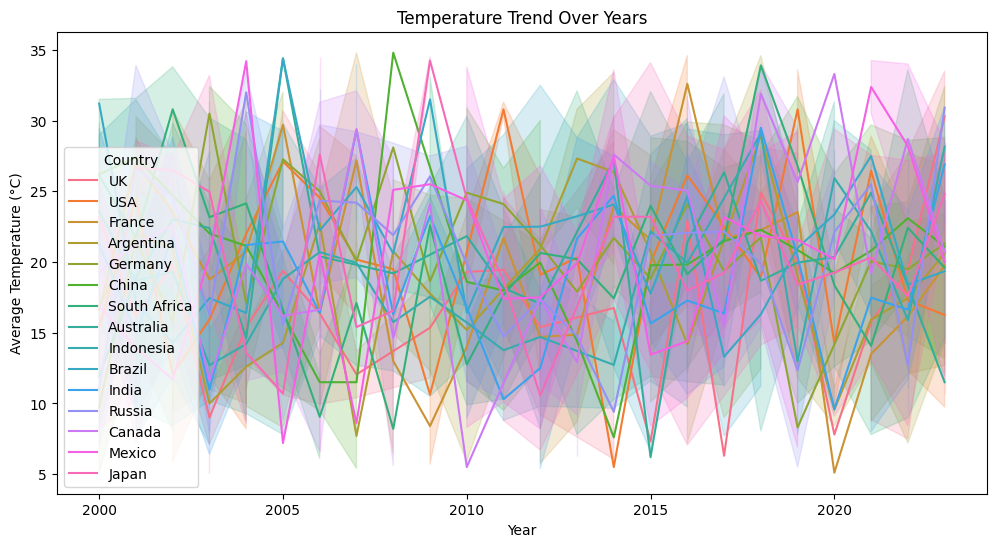

In [30]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Avg Temperature (°C)', data=df, hue='Country', legend=True)
plt.title("Temperature Trend Over Years")
plt.xlabel("Year")
plt.ylabel("Average Temperature (°C)")
plt.show

### The average temperature fluctuate over the year but shows no consistence long term increase or decrease where the temperature significantly droped during around 2011 and avg. temp becomes max during around 2017/2018 indicating unusual warming period.

<Axes: xlabel='Year', ylabel='CO2 Emissions (Tons/Capita)'>

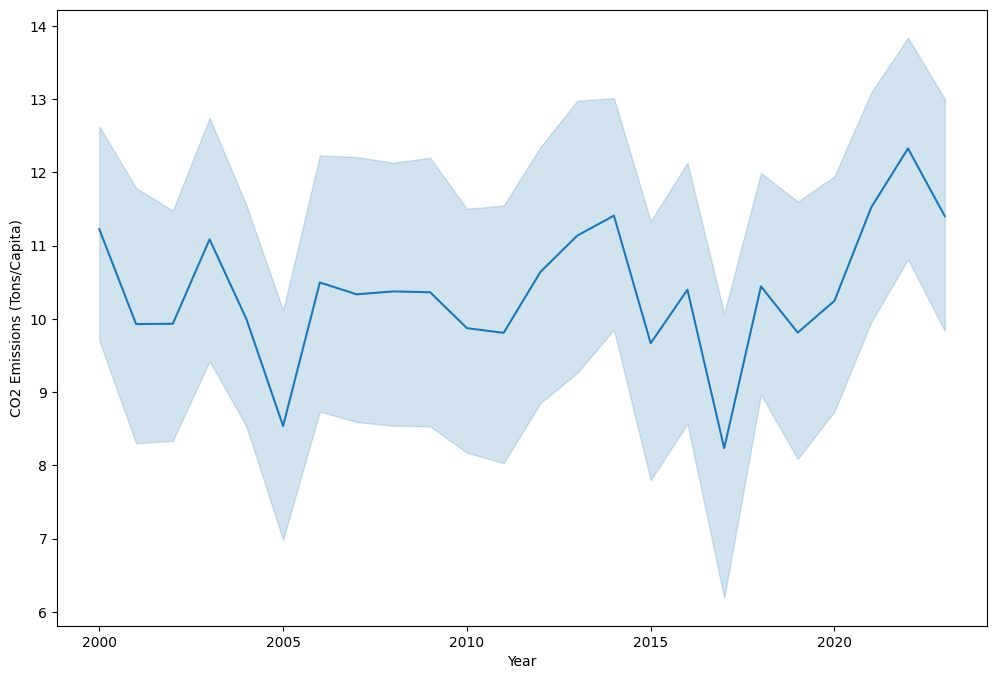

In [31]:
plt.figure(figsize=(12,8))
sns.lineplot(x='Year', y='CO2 Emissions (Tons/Capita)',data=df)

This graph shows fluctuating CO2 emissions per capita over time, with periods of increase and decrease, but no clear overall trend.

<function matplotlib.pyplot.show(close=None, block=None)>

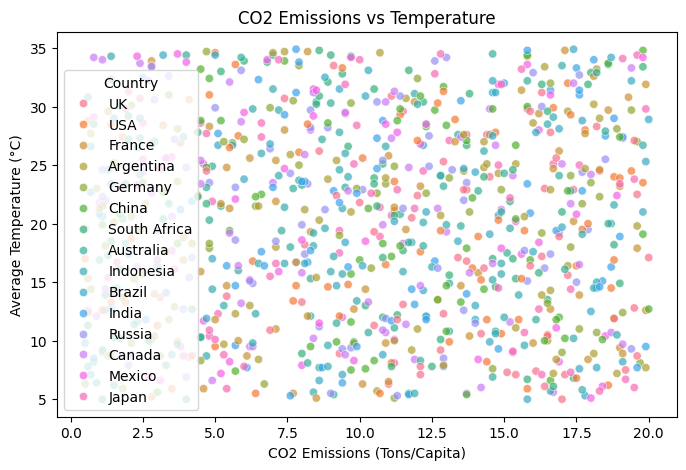

In [32]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='CO2 Emissions (Tons/Capita)', y='Avg Temperature (°C)', hue='Country', data=df, alpha=0.7)
plt.title("CO2 Emissions vs Temperature")
plt.xlabel("CO2 Emissions (Tons/Capita)")
plt.ylabel("Average Temperature (°C)")
plt.show

This scatter plot reveals no clear correlation between average temperature and CO2 emissions per capita across the listed countries.  The data points are widely dispersed, indicating that higher CO2 emissions do not necessarily correspond to higher average temperatures, or vice versa.  

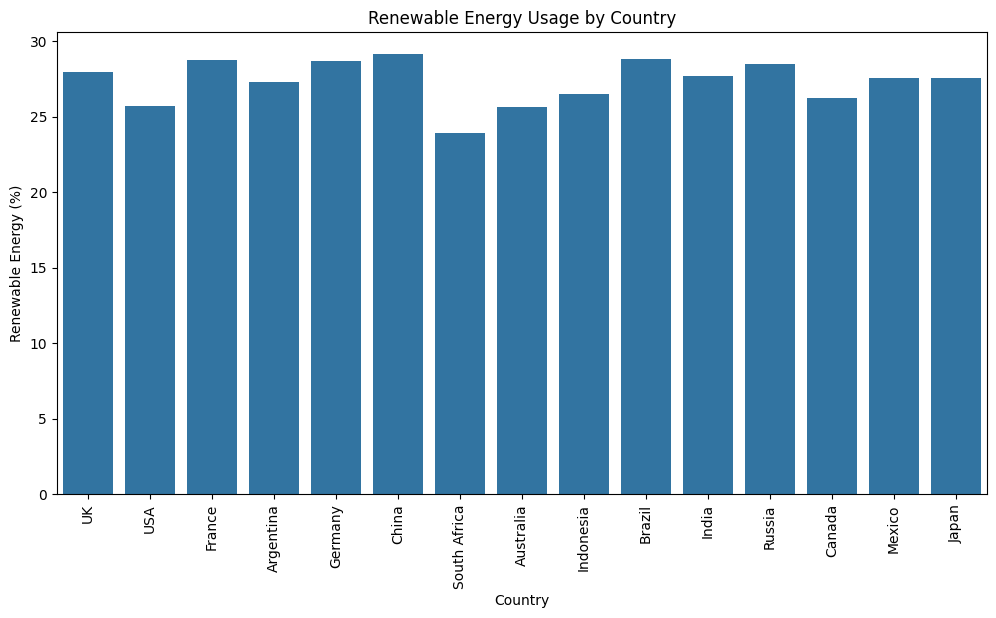

In [33]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Country', y='Renewable Energy (%)', data=df, ci=None)
plt.xticks(rotation=90)
plt.title("Renewable Energy Usage by Country")
plt.xlabel("Country")
plt.ylabel("Renewable Energy (%)")
plt.show()

The chart shows that renewable energy usage varies significantly across these countries.  Some, like China and Brazil, utilize a relatively high percentage, while others, such as the UK and USA, utilize a lower percentage as in the data.  

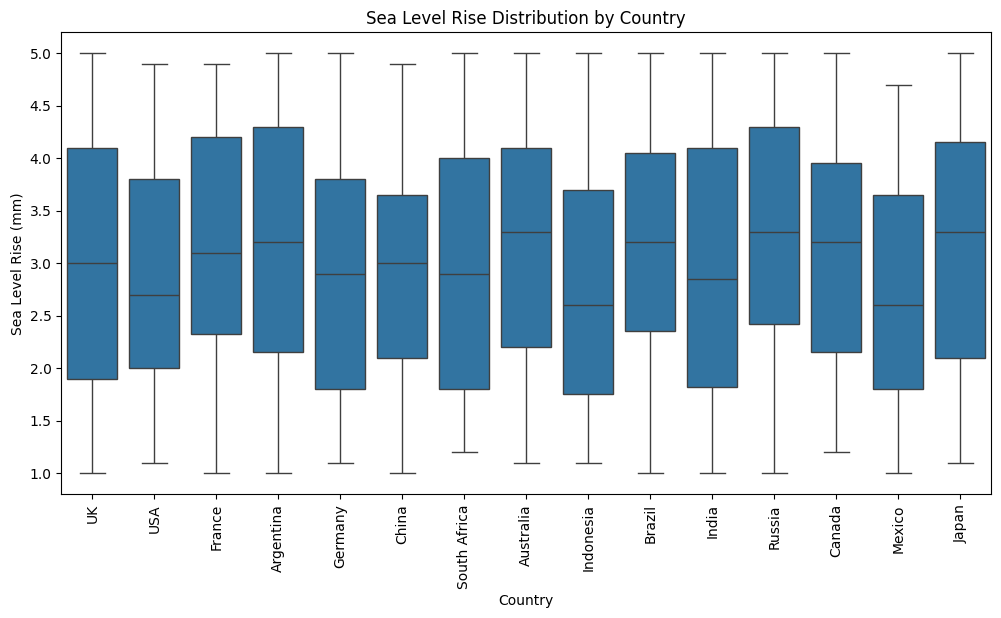

In [34]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Country', y='Sea Level Rise (mm)', data=df)
plt.xticks(rotation=90)
plt.title("Sea Level Rise Distribution by Country")
plt.xlabel("Country")
plt.ylabel("Sea Level Rise (mm)")
plt.show()

The box plot highlights variations in sea level rise across countries, showing differences in range (box height) and median levels (line inside the box). It indicates that sea level rise is uneven globally, with some countries experiencing greater variation or higher typical levels.

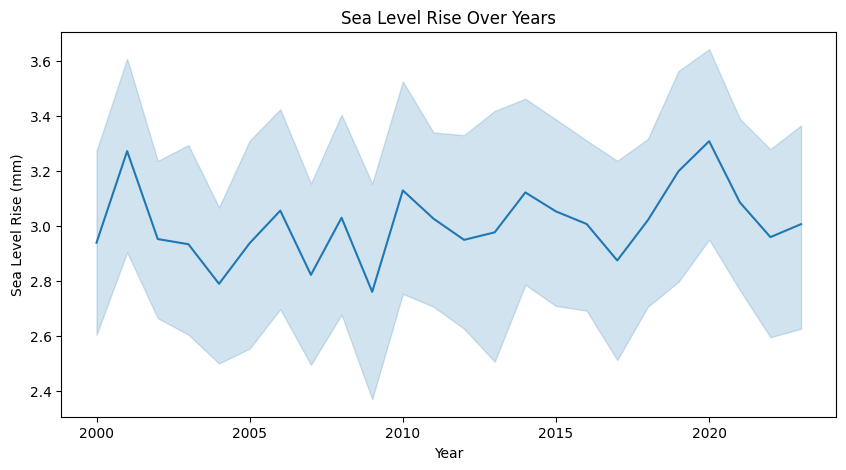

In [35]:
plt.figure(figsize=(10, 5))
sns.lineplot(x='Year', y='Sea Level Rise (mm)', data=df)
plt.title("Sea Level Rise Over Years")
plt.xlabel("Year")
plt.ylabel("Sea Level Rise (mm)")
plt.show()

This graph shows sea level rise fluctuating over time, but with an overall upward trend from 2000 to 2022.

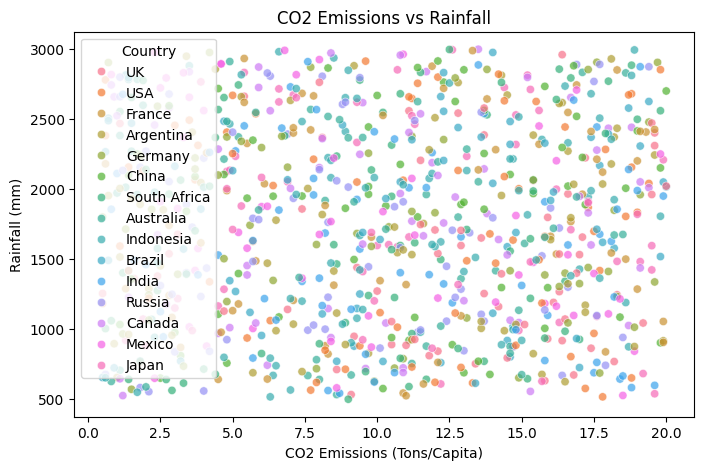

In [36]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='CO2 Emissions (Tons/Capita)', y='Rainfall (mm)', hue='Country', data=df, alpha=0.7)
plt.title("CO2 Emissions vs Rainfall")
plt.xlabel("CO2 Emissions (Tons/Capita)")
plt.ylabel("Rainfall (mm)")
plt.show()

The scatter plot shows no clear relationship between CO2 emissions per capita and rainfall, with randomly scattered data points indicating no correlation between the two variables.

In [37]:
grouped = df.groupby('Country')['CO2 Emissions (Tons/Capita)'].sum()

# Select the top 10 countries with the highest CO2 emissions
top_countries = grouped.nlargest(10).index

# Filter the original dataset to include only rows from the top countries
df_top = df[df['Country'].isin(top_countries)]

# Sort by 'CO2 Emissions (Tons/Capita)' and keep only the first 10 rows
df_top_10 = df_top.sort_values('CO2 Emissions (Tons/Capita)', ascending=False).drop_duplicates('Country').head(10)
df_top_10

,Year,Country,Avg Temperature (°C),CO2 Emissions (Tons/Capita),Sea Level Rise (mm),Rainfall (mm),Population,Renewable Energy (%),Extreme Weather Events,Forest Area (%)
707,2021,UK,17.1,20.0,5.0,2022,284705392,41.0,14,52.7
425,2012,China,12.7,20.0,4.1,2701,1014597705,46.0,11,57.3
237,2015,Brazil,28.9,20.0,3.5,2017,1213528698,12.2,7,47.8
212,2000,France,12.6,19.9,1.3,1056,400673293,29.6,14,41.8
286,2016,India,9.5,19.9,3.8,1951,926054419,20.2,13,34.4
312,2007,Argentina,7.7,19.9,1.6,918,203114192,16.9,10,58.7
564,2022,Japan,29.8,19.9,1.3,2210,968059240,34.9,11,28.6
815,2014,South Africa,33.4,19.8,2.8,2560,1064093028,23.3,13,62.2
616,2006,USA,23.5,19.8,2.1,2853,629814899,7.6,12,70.0
515,2000,Indonesia,26.7,19.8,1.8,1807,540634691,27.9,11,34.5


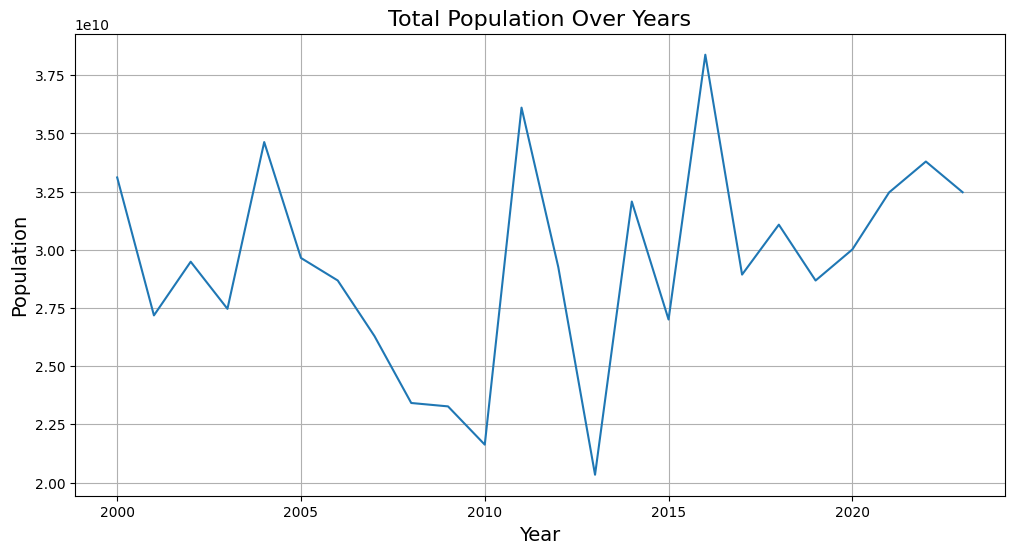

In [38]:

yearly_population = df.groupby('Year')['Population'].sum()

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(x=yearly_population.index, y=yearly_population.values)
plt.title('Total Population Over Years', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Population', fontsize=14)
plt.grid(True)
plt.show()



The graph shows the population going up and down a bit, but overall it mostly stays the same, with a slight increase over time.

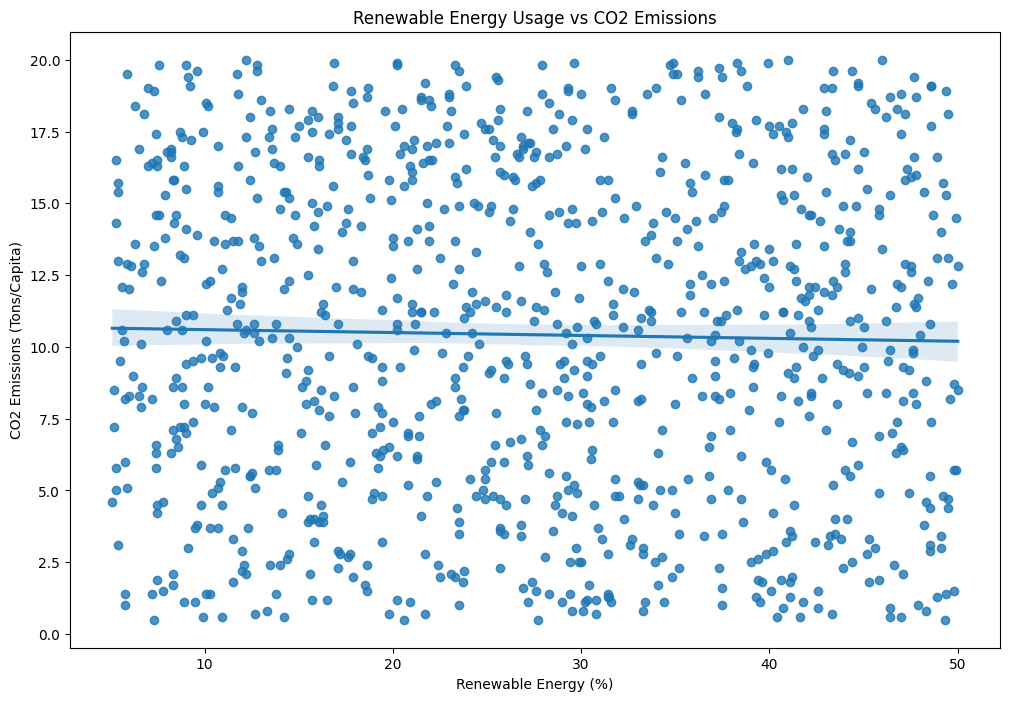

In [39]:

plt.figure(figsize=(12,8))
sns.regplot(x='Renewable Energy (%)', y='CO2 Emissions (Tons/Capita)', data=df)
plt.title('Renewable Energy Usage vs CO2 Emissions')
plt.show()

The scatter plot shows no correlation between renewable energy percentage and CO2 emissions per capita, as the flat trend line indicates no strong relationship between the two variables.

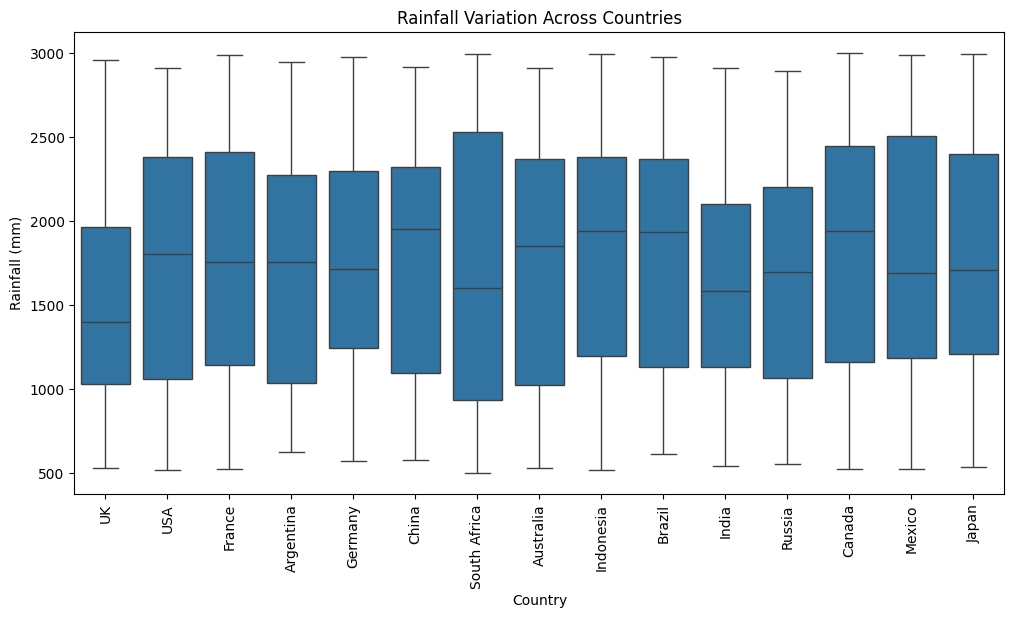

In [40]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Country', y='Rainfall (mm)', data=df)
plt.xticks(rotation=90)
plt.title("Rainfall Variation Across Countries")
plt.xlabel("Country")
plt.ylabel("Rainfall (mm)")
plt.show()


The box plot shows significant variation in median rainfall and range across countries, reflecting diverse climates and geographic factors affecting precipitation patterns.

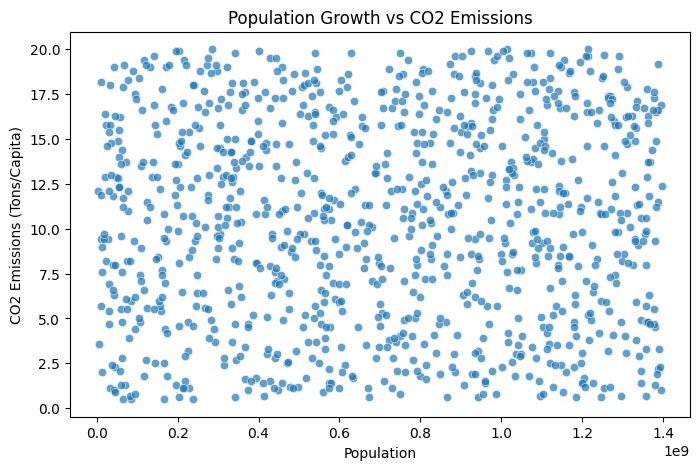

In [41]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Population', y='CO2 Emissions (Tons/Capita)', data=df, alpha=0.7)
plt.title("Population Growth vs CO2 Emissions")
plt.xlabel("Population")
plt.ylabel("CO2 Emissions (Tons/Capita)")
plt.show()

The data points appear to be scattered randomly, indicating that there is no strong correlation between population size and per capita CO2 emissions. Even at similar population levels, CO2 emissions per capita vary significantly, suggesting that factors other than population size influence emissions.

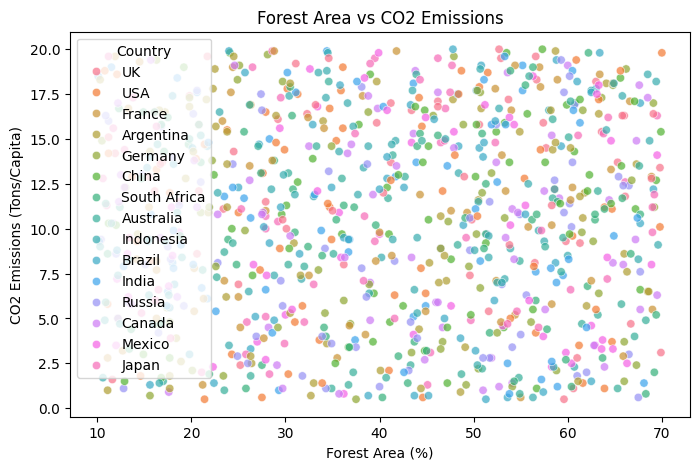

In [42]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Forest Area (%)', y='CO2 Emissions (Tons/Capita)', hue='Country', data=df, alpha=0.7)
plt.title("Forest Area vs CO2 Emissions")
plt.xlabel("Forest Area (%)")
plt.ylabel("CO2 Emissions (Tons/Capita)")
plt.show()


The points appear randomly distributed, indicating that forest area percentage does not have a clear or direct influence on CO2 emissions per capita.

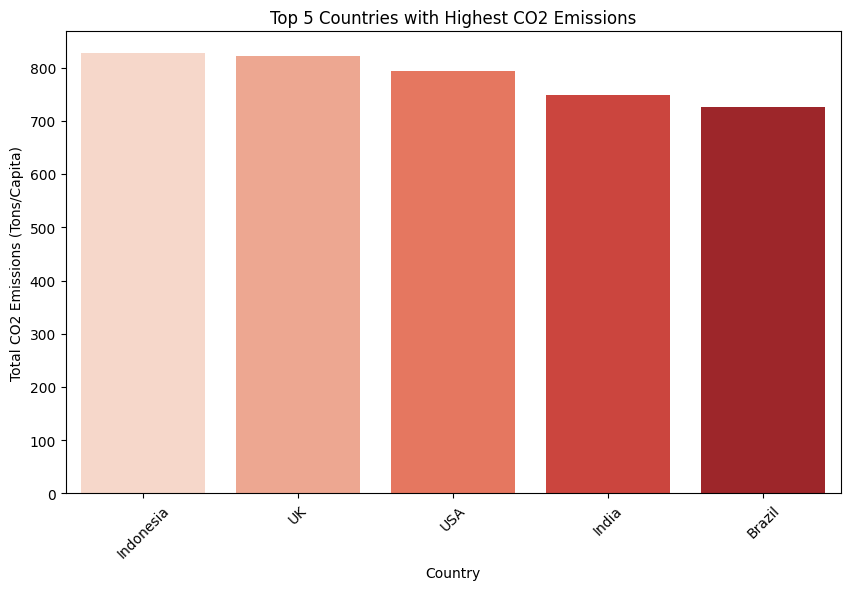

In [43]:
top_countries = df.groupby('Country')['CO2 Emissions (Tons/Capita)'].sum().nlargest(5)

# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(x=top_countries.index, y=top_countries.values, palette='Reds')
plt.title("Top 5 Countries with Highest CO2 Emissions")
plt.xlabel("Country")
plt.ylabel("Total CO2 Emissions (Tons/Capita)")
plt.xticks(rotation=45)
plt.show()

Indonesia has the highest total CO2 emissions among the listed countries. The UK, USA, and Indonesia have comparable emission levels, while India and Brazil have slightly lower emissions.

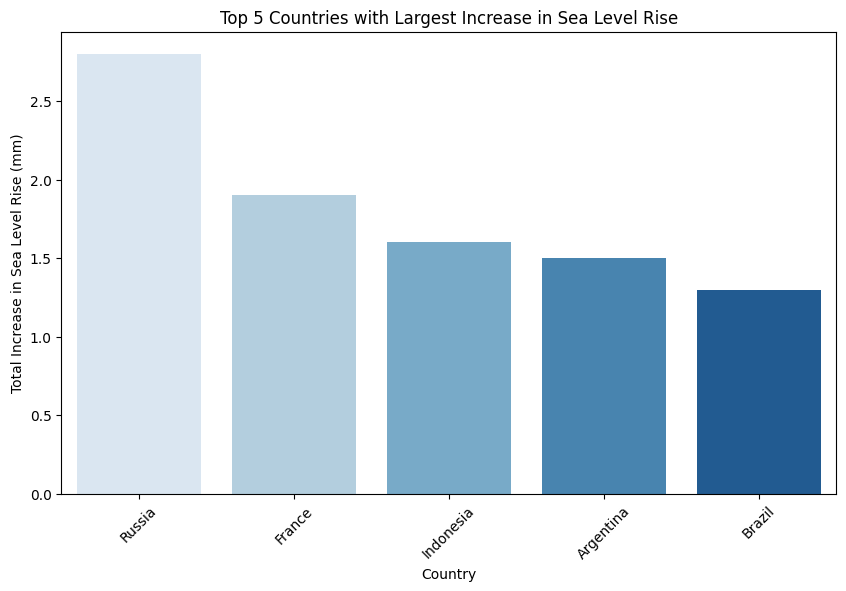

In [44]:
df1=df.copy()
df1['Sea Level Change'] = df1.groupby('Country')['Sea Level Rise (mm)'].diff()

# Find the top 5 countries with the highest increase in sea level rise
top_sea_level_countries = df1.groupby('Country')['Sea Level Change'].sum().nlargest(5)

# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(x=top_sea_level_countries.index, y=top_sea_level_countries.values, palette='Blues')
plt.title("Top 5 Countries with Largest Increase in Sea Level Rise")
plt.xlabel("Country")
plt.ylabel("Total Increase in Sea Level Rise (mm)")
plt.xticks(rotation=45)
plt.show()


The bar chart shows the top 5 countries with the largest increase in sea level rise. Russia leads with the highest total increase, followed by France, Indonesia, Argentina, and Brazil, with Brazil having the smallest increase among the five.

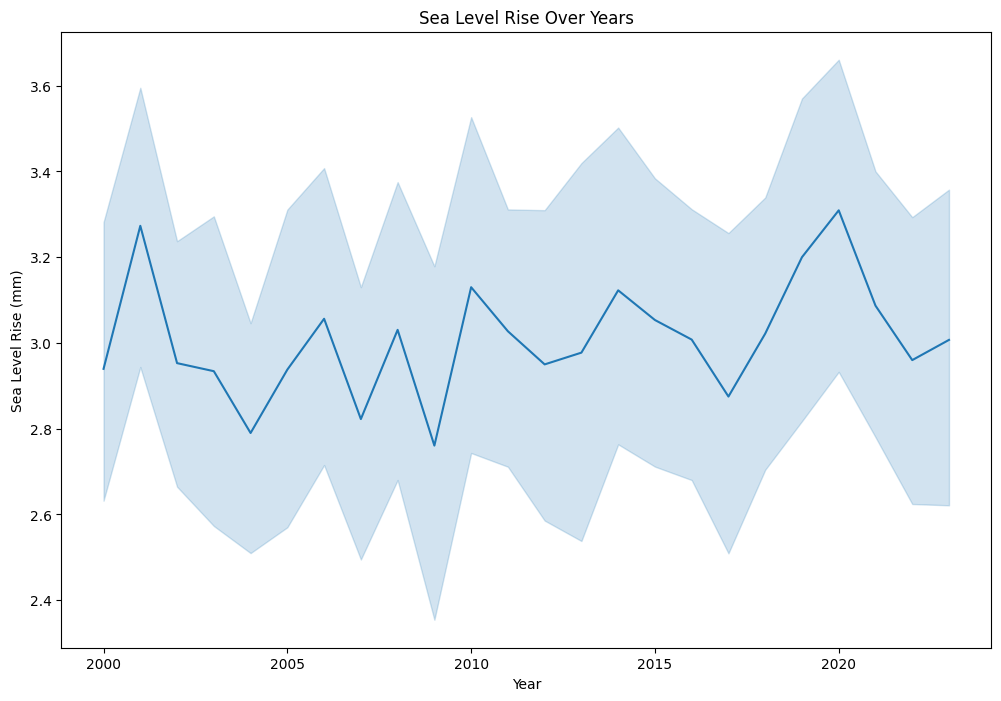

In [45]:
plt.figure(figsize=(12,8))
sns.lineplot(x='Year', y='Sea Level Rise (mm)',data=df)
plt.title("Sea Level Rise Over Years")
plt.show()

In [46]:
rainfall_over_year=df.groupby(['Year'])['Rainfall (mm)'].mean().reset_index()
rainfall_over_year

,Year,Rainfall (mm)
0,2000,1687.735849
1,2001,1756.902439
2,2002,1928.745098
3,2003,1826.707317
4,2004,1713.920000
5,2005,1594.945946
6,2006,1946.974359
7,2007,1662.400000
8,2008,1724.333333
9,2009,1581.424242


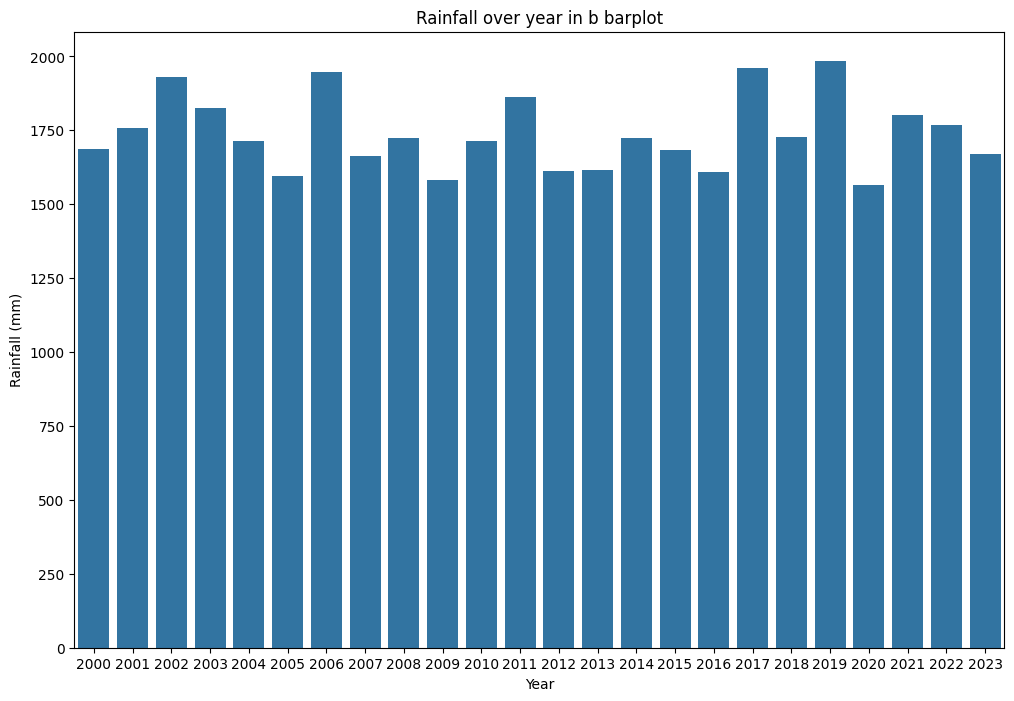

In [47]:
plt.figure(figsize=(12,8))
sns.barplot(x='Year', y='Rainfall (mm)',data=rainfall_over_year)
plt.title("Rainfall over year in b barplot")
plt.show()

The rainfall varies from year to year, with some years receiving significantly higher rainfall than others.  Certain years, such as 2003, 2007, 2011, 2018, and 2019, seem to have received the highest amounts of rainfall

In [48]:
extreme_event_over_year=df.groupby(['Year'])['Extreme Weather Events'].mean().reset_index()
extreme_event_over_year

,Year,Extreme Weather Events
0,2000,7.830189
1,2001,7.682927
2,2002,7.058824
3,2003,7.975610
4,2004,6.420000
5,2005,7.702703
6,2006,7.666667
7,2007,7.600000
8,2008,8.000000
9,2009,6.090909


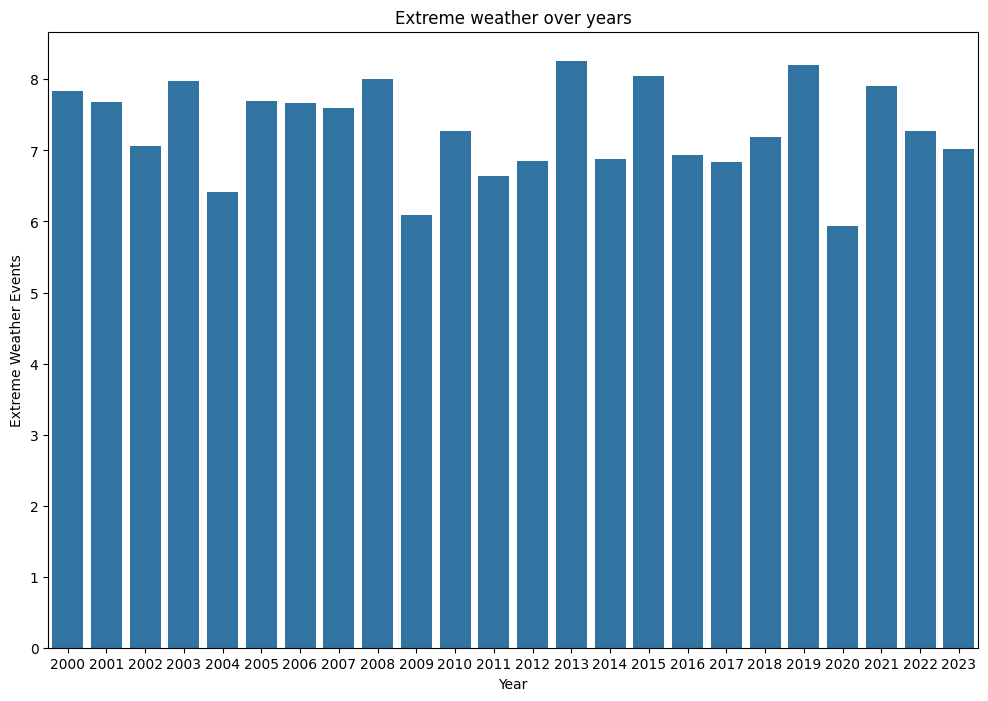

In [49]:
plt.figure(figsize=(12,8))
sns.barplot(x='Year', y='Extreme Weather Events',data=extreme_event_over_year)
plt.title("Extreme weather over years")
plt.show()

The trend suggests that extreme weather events have been persistent over the years with slight variations. While no clear upward or downward trend is observed

In [50]:
forest_area_over_year=df.groupby(['Year'])['Forest Area (%)'].mean().reset_index()
forest_area_over_year


,Year,Forest Area (%)
0,2000,41.890566
1,2001,42.217073
2,2002,41.062745
3,2003,39.165854
4,2004,42.238000
5,2005,40.735135
6,2006,40.702564
7,2007,42.187500
8,2008,43.022222
9,2009,44.293939


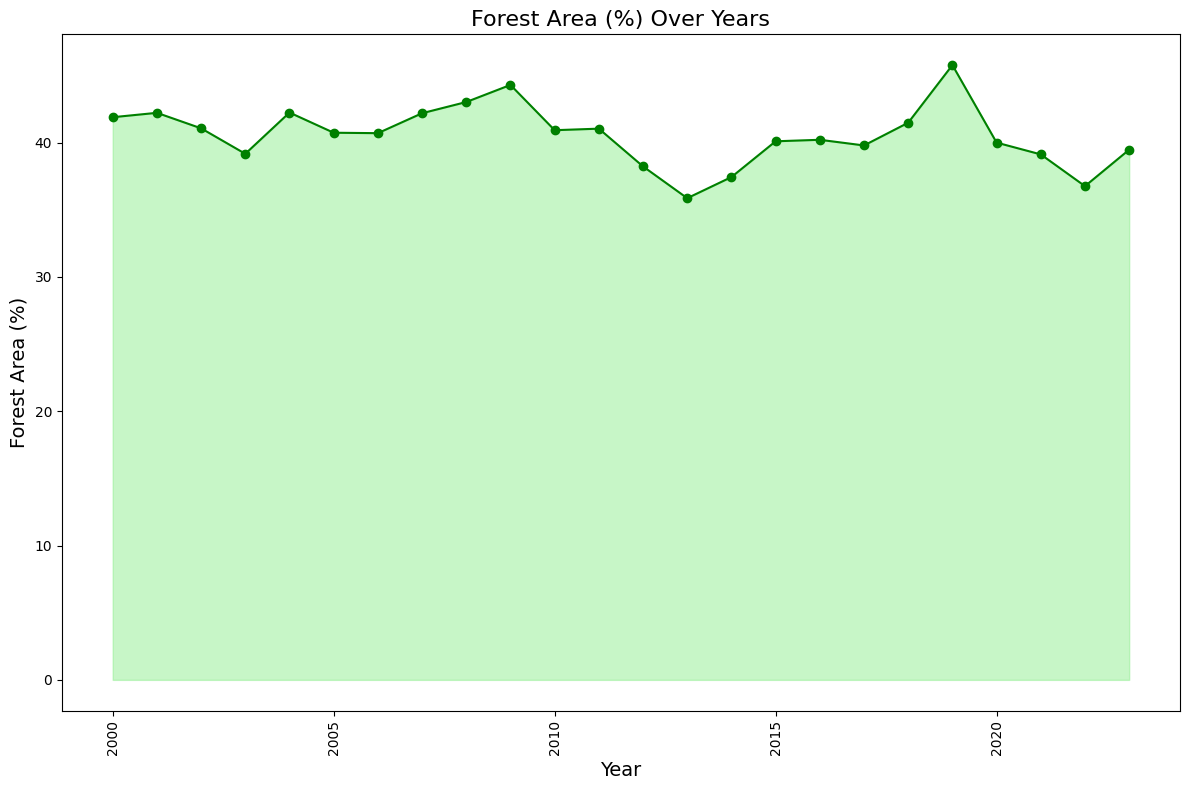

In [51]:
plt.figure(figsize=(12, 8))
plt.fill_between(forest_area_over_year['Year'],
                 forest_area_over_year['Forest Area (%)'],
                 color='lightgreen', alpha=0.5)
plt.plot(forest_area_over_year['Year'], forest_area_over_year['Forest Area (%)'],
         marker='o', color='green')
plt.xticks(rotation=90)
plt.title('Forest Area (%) Over Years', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Forest Area (%)', fontsize=14)
plt.tight_layout()
plt.show()


The graph indicates that the percentage of forest area has remained relatively stable over the years, with minor fluctuations.

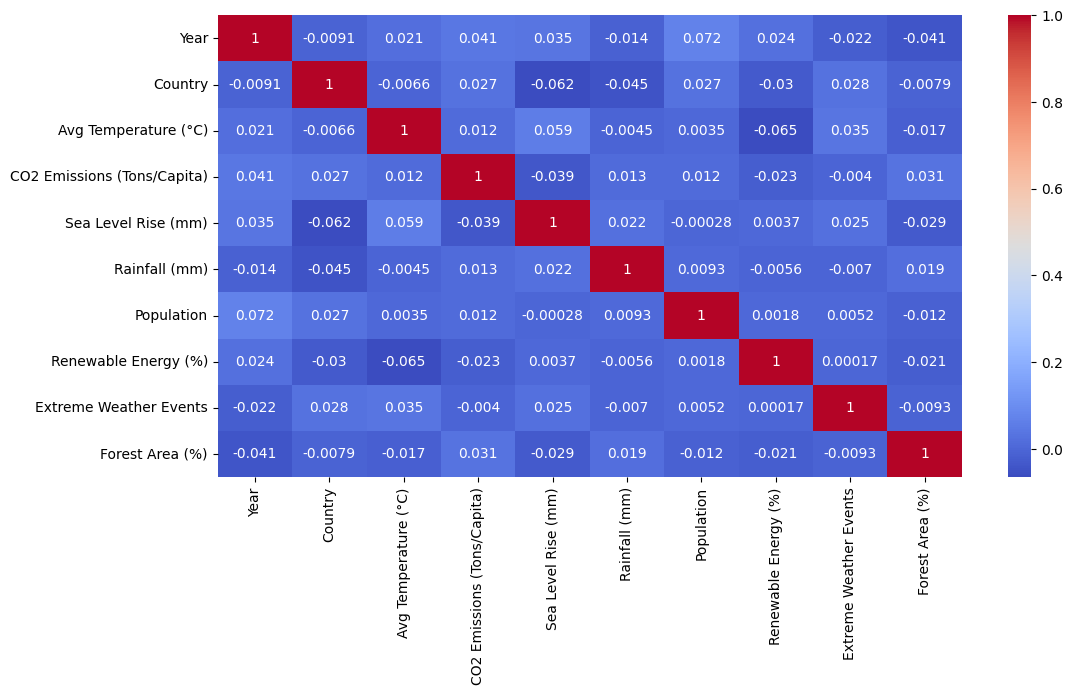

In [54]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

The correlation matrix reveals a moderate positive correlation between "Sea Level Rise (mm)" and "Sea Level Change" (0.68), while other features show weak or negligible correlations, indicating minimal multicollinearity and largely independent variables.

In [53]:
encoder=LabelEncoder()
df['Country']=encoder.fit_transform(df['Country'])

In [55]:
x=df.drop(columns=["CO2 Emissions (Tons/Capita)"])
y=df["CO2 Emissions (Tons/Capita)"]

In [56]:
y.shape

(1000,)

In [57]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print(f'Shape of x_train is {x_train.shape}')
print(f'Shape of x_test is {x_test.shape}')
print(f'Shape of y_train is {y_train.shape}')
print(f'Shape of y_test is {y_test.shape}')

Shape of x_train is (800, 9)
Shape of x_test is (200, 9)
Shape of y_train is (800,)
Shape of y_test is (200,)


In [58]:
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [59]:
x_train

,Year,Country,Avg Temperature (°C),Sea Level Rise (mm),Rainfall (mm),Population,Renewable Energy (%),Extreme Weather Events,Forest Area (%)
29,2016,4,32.4,3.2,759,1358197397,31.8,9,41.1
535,2006,14,23.9,1.4,1835,1146873886,34.0,9,36.1
695,2007,8,16.6,3.8,740,914386174,8.6,9,26.1
557,2023,14,33.3,1.4,882,589637290,26.1,6,34.9
836,2010,11,11.5,3.4,1796,620506174,27.3,1,18.0
...,...,...,...,...,...,...,...,...,...
106,2002,2,19.1,3.1,920,947263298,37.0,14,20.1
270,2022,6,21.5,1.3,1349,248771060,19.5,3,63.3
860,2009,11,27.5,1.1,1058,1142110790,19.9,14,65.9
435,2009,0,16.4,3.7,1122,306798170,9.3,8,47.8


Building Primary Model

In [60]:
class LinearRegression:
    def __init__(self,L=0.001,epochs=1000,m=0,c=0):
        self.L=L
        self.epochs=epochs
        self.m=None
        self.c=0
    def fit(self,x,y):
        n_samples,n_features=x.shape
        self.m=np.zeros(n_features)
        for _ in range(self.epochs):
            y_pred = np.dot(x, self.m) + self.c
            d_m = (-2/n_samples) * np.dot(x.T, (y - y_pred))
            d_c = (-2/n_samples) * np.sum(y - y_pred)
            self.m -= self.L * d_m
            self.c -= self.L * d_c
    def predict(self,x):
        return np.dot(x, self.m) + self.c

In [61]:
model=LinearRegression()
model.fit(x_train_scaled,y_train)

In [62]:
y_pred=model.predict(x_test_scaled)

In [64]:
mse=np.mean((y_pred - y_test) ** 2)
rmse=np.sqrt(mse)
r2= 1 - (np.sum((y_test - y_pred) ** 2) / np.sum((y_test - np.mean(y_test)) ** 2))
print(f'MSE = {mse}')
print(f'RMSE = {rmse}')
print(f'R2 = {r2}')

MSE = 34.44105091441439
RMSE = 5.868649837434024
R2 = -0.05613123012671428


Building Two Models Decision tree and XGBoost


In [65]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
dt.fit(x_train_scaled,y_train)
y_pred_dt=dt.predict(x_test_scaled)

In [68]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
dt_results = {
    'MAE': mean_absolute_error(y_test, y_pred_dt),
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_dt)),
    'R2': r2_score(y_test, y_pred_dt)
}

print("result:")
print(dt_results)

result:
{'MAE': 6.7275, 'RMSE': 8.171043385027398, 'R2': -1.0473708853804773}


In [55]:
import xgboost as xgb
xg_reg = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
xg_reg.fit(x_train_scaled ,y_train)
y_pred_xgb=xg_reg.predict(x_test_scaled)

In [56]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# After making sure there are no conflicts:
final_results = {
    'MAE': mean_absolute_error(y_test, y_pred_xgb),
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_xgb)),
    'R2': r2_score(y_test, y_pred_xgb)
}

print("Final Model Performance:")
print(final_results)

Final Model Performance:
{'MAE': 5.534452033177018, 'RMSE': 6.53517572610566, 'R2': -0.3096523606980619}


XGBoost model tends to improve a little in terms of MAE and RMSE but all model tends to perform poor as R2 is negative.

HyperParameter Tunning

In [57]:
dt_param_dist = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'max_features': ['auto', 'sqrt', 'log2', None],
    'max_leaf_nodes': randint(10, 100),
}

dt = DecisionTreeRegressor(random_state=42)
random_search_dt = RandomizedSearchCV(
    dt, param_distributions=dt_param_dist, n_iter=100, cv=5, n_jobs=-1, verbose=2, random_state=42,scoring='r2'
)

random_search_dt.fit(x_train_scaled, y_train)
print("Best parameters found: ", random_search_dt.best_params_)
print("Best cross-validation score: {:.2f}".format(random_search_dt.best_score_))
best_model_dt = random_search_dt.best_estimator_

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters found:  {'max_depth': 20, 'max_features': 'sqrt', 'max_leaf_nodes': 11, 'min_samples_leaf': 17, 'min_samples_split': 9}
Best cross-validation score: -0.07


In [61]:
best_model_dt.fit(x_train_scaled, y_train)
y_pred_dt_hp = best_model_dt.predict(x_test_scaled)

# After making sure there are no conflicts:
final_results = {
    'MAE': mean_absolute_error(y_test, y_pred_dt_hp),
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_dt_hp)),
    'R2': r2_score(y_test, y_pred_dt_hp)
}

print("Final Model Performance:")
print(final_results)

Final Model Performance:
{'MAE': 4.98553936768015, 'RMSE': 5.780493591755788, 'R2': -0.024640076593848148}


After hyperparameter tuning of decision tree R2 slighly improves but again it has negative values so it also poorly perform.

In [58]:
!pip install scikit-learn==1.2.0

In [59]:
!pip install --upgrade xgboost

In [60]:

param_dist = {
    'learning_rate': uniform(0.01, 0.3),
    'n_estimators': randint(100, 1000),
    'max_depth': randint(3, 15),
    'min_child_weight': randint(1, 10),
    'subsample': uniform(0.5, 0.5),
    'colsample_bytree': uniform(0.5, 0.5),
    'gamma': uniform(0, 0.5)
}

random_search = RandomizedSearchCV(estimator=xg_reg, param_distributions=param_dist,
                                   n_iter=50, scoring='neg_mean_squared_error', cv=3, random_state=42, n_jobs=-1)

random_search.fit(x_train_scaled, y_train)

best_params = random_search.best_params_
print(f"Best Hyperparameters: {best_params}")

best_xg_reg = random_search.best_estimator_

Best Hyperparameters: {'colsample_bytree': 0.8609993861334124, 'gamma': 0.4692763545078751, 'learning_rate': 0.010233629752304298, 'max_depth': 14, 'min_child_weight': 5, 'n_estimators': 260, 'subsample': 0.6521211214797689}


In [62]:
best_xg_reg.fit(x_train_scaled, y_train)
y_pred_xgb_hp = best_xg_reg.predict(x_test_scaled)
final_results = {
    'MAE': mean_absolute_error(y_test, y_pred_xgb_hp),
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_xgb_hp)),
    'R2': r2_score(y_test, y_pred_xgb_hp)
}

print("Final Model Performance:")
print(final_results)

Final Model Performance:
{'MAE': 5.061413523197174, 'RMSE': 5.884055639724346, 'R2': -0.06168341173494296}


After hyperparameter tunning of XGBoost, we can see that there is no good improvement in the performance.

Feature selection for decision tree


In [63]:
from sklearn.feature_selection import RFE
dt=DecisionTreeRegressor()
n_features_to_select = 5  # Number of features to keep
rfe = RFE(estimator=dt, n_features_to_select=n_features_to_select)

rfe.fit(x_train_scaled, y_train)
selected_features = rfe.support_
ranking = rfe.ranking_
X_train_rfe = rfe.transform(x_train_scaled)
X_test_rfe = rfe.transform(x_test_scaled)


In [64]:
dt.fit(X_train_rfe, y_train)
y_pred_sf_dt = dt.predict(X_test_rfe)

In [65]:
final_results = {
    'MAE': mean_absolute_error(y_test, y_pred_sf_dt),
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_sf_dt)),
    'R2': r2_score(y_test, y_pred_sf_dt)
}

print("Final Model Performance:")
print(final_results)

Final Model Performance:
{'MAE': 7.3165, 'RMSE': 8.712889876499071, 'R2': -1.327908682639459}


Feature selection for XGBoost


In [66]:
from sklearn.feature_selection import RFE
xg_reg = xgb.XGBRegressor()
n_features_to_select = 5
rfe_xgb = RFE(estimator=xg_reg, n_features_to_select=n_features_to_select)

# Fit RFE
rfe_xgb.fit(x_train_scaled, y_train)

# Get selected features
selected_features = rfe_xgb.support_  # Boolean mask of selected features
ranking = rfe_xgb.ranking_  # Feature rankings (1 indicates selected features)

# Transform the dataset to include only selected features
X_train_rfe_xgb = rfe_xgb.transform(x_train_scaled)
X_test_rfe_xgb = rfe_xgb.transform(x_test_scaled)


In [67]:
xg_reg.fit(X_train_rfe_xgb, y_train)
y_pred_sf_xgb = xg_reg.predict(X_test_rfe_xgb)

final_results = {
    'MAE': mean_absolute_error(y_test, y_pred_sf_xgb),
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_sf_xgb)),
    'R2': r2_score(y_test, y_pred_sf_xgb)
}

print("Final Model Performance:")
print(final_results)


Final Model Performance:
{'MAE': 5.716770171403884, 'RMSE': 6.597867828193373, 'R2': -0.3348999377873403}


Final model for decision tree

In [68]:
best_model_dt.fit(X_train_rfe,y_train)
y_final_pred_dt=best_model_dt.predict(X_test_rfe)
final_results = {
    'MAE': mean_absolute_error(y_test, y_final_pred_dt),
    'RMSE': np.sqrt(mean_squared_error(y_test, y_final_pred_dt)),
    'R2': r2_score(y_test, y_final_pred_dt)
}

print("Final Model Performance:")
print(final_results)


Final Model Performance:
{'MAE': 4.986126040174683, 'RMSE': 5.833356406058237, 'R2': -0.04346650699150967}


Final model for XGBoost

In [69]:
best_xg_reg.fit(X_train_rfe_xgb,y_train)
y_final_pred_xgb=best_xg_reg.predict(X_test_rfe_xgb)
final_results = {
    'MAE': mean_absolute_error(y_test, y_final_pred_xgb),
    'RMSE': np.sqrt(mean_squared_error(y_test, y_final_pred_xgb)),
    'R2': r2_score(y_test, y_final_pred_xgb)
}

print("Final Model Performance:")
print(final_results)

Final Model Performance:
{'MAE': 5.0843001770973215, 'RMSE': 5.92672337703433, 'R2': -0.07713665519048929}


Both models have relatively similar performance, with XGBoost showing marginally worse results in terms of MAE, RMSE, and R². Both models suffer from a negative R², meaning they are not able to capture the relationships in the data effectively